In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('merged_data.csv', parse_dates=['date'])
data.set_index("date", inplace=True)
data = data.dropna()

features = data[[
       '10YLT-1001A0008Q_DA_eurmwh',
       'temperature_2m_previous_day1', 
       'direct_normal_irradiance_instant_previous_day1',
       'shortwave_radiation_previous_day1',
       'wind_speed_80m_previous_day1',
       'wind_direction_80m_previous_day1', 'latitude', 'longitude',
       'temperature_delta', 'direct_normal_irradiance_delta',
       'shortwave_radiation_delta', 'wind_speed_80m_delta',
       'wind_direction_80m_delta'
]]  
target= data['LT_imb_MW']
# target = data['LT_mfrr_SA_up_activ']
# target = data['LT_mfrr_SA_down_activ']


Training RMSE: 15.606637731576386
Training R²: 0.17317843358308715
Test RMSE: 15.58670807441299
Test R²: 0.16263131547678256

Model Coefficients:
                                                Coefficient
10YLT-1001A0008Q_DA_eurmwh                        -1.617513
temperature_2m_previous_day1                      -0.186765
direct_normal_irradiance_instant_previous_day1     2.048749
shortwave_radiation_previous_day1                  5.144266
wind_speed_80m_previous_day1                       1.002201
wind_direction_80m_previous_day1                   0.365866
latitude                                          -0.005423
longitude                                          0.160972
temperature_delta                                 -0.229475
direct_normal_irradiance_delta                     0.853340
shortwave_radiation_delta                          1.520337
wind_speed_80m_delta                               0.569628
wind_direction_80m_delta                           0.140196


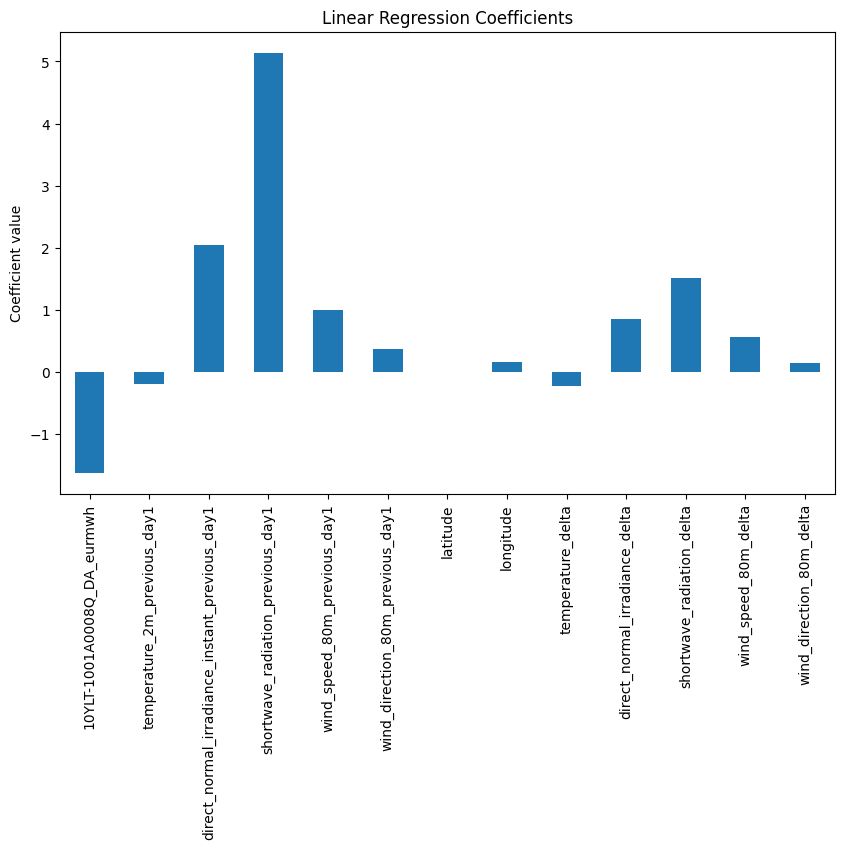

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training R²: {train_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

coefficients = pd.DataFrame(lr_model.coef_, index=features.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

plt.figure(figsize=(10, 6))
coefficients['Coefficient'].plot(kind='bar')
plt.title('Linear Regression Coefficients')
plt.ylabel('Coefficient value')
plt.show()